In [1]:
from ase.io import Trajectory
import nglview
import numpy as np
#from moviepy.config import change_settings
import matplotlib.pyplot as plt
from matplotlib.widgets import Button, Slider
import mpl_interactions.ipyplot as iplt
import os

#change_settings({"FFMPEG_BINARY": "/Users/ktrerayapiwat/Software/custom/ffmpeg"})
os.environ["FFMPEG_BINARY"] = "/Users/ktrerayapiwat/Software/custom/ffmpeg"
traj = Trajectory('./traj/md_0000_seed_1_800K.traj', mode='r')


view = nglview.show_asetraj(traj, gui=True, add_unitcell=True)
#view.frame=100/
view.camera = 'orthographic'
view._remote_call("setSize", target="Widget", args=['400px','400px'])
view.control.zoom(0.20)
view.clear_representations()
#view.add_ball_and_stick(radius=0.25, selection='_H or _Ni or _O')
view.add_ball_and_stick(radius=0.35, selection='_Ni or _H')
view.add_unitcell()
#view.control.spin([0, 1, 0], np.pi)
#view.add_ball_and_stick(selection='_Ni')
view.player.parameters = {'delay':50, 'step':100}
view.stage.set_parameters(**{'transparent':True})

ModuleNotFoundError: No module named 'ase'

In [2]:
view

NGLWidget(max_frame=200)

In [11]:
from nglview.contrib.movie import MovieMaker
movie = MovieMaker(view, 
                   output='HNi.gif', 
                   in_memory=True,
                   fps=60)
movie.make()

IntProgress(value=0, description='Rendering ...', max=142)

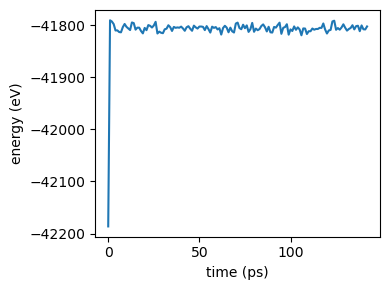

In [3]:
import matplotlib.pyplot as plt

energy = [atoms.get_total_energy() for atoms in traj]
time = np.arange(len(traj))

fig, ax = plt.subplots(figsize = [4,3])
ax.plot(time, energy)
ax.set_ylabel('energy (eV)')
ax.set_xlabel('time (ps)')
fig.tight_layout()
#fig.savefig('0.500H.png', dpi=300)